<a href="https://colab.research.google.com/github/SameerMujeeb2000/SameerMujeeb2000/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dataset = pd.read_csv("/content/diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Checking null values in our dataset
dataset.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Observation 1: There are no missing values in our dataset

In [4]:
# Getting to know the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
dataset["Outcome"].value_counts(normalize=True) * 100

,proportion
Outcome,
0,65.104167
1,34.895833


Observation 2: We have an imbalanced dataset. Therefore, we will have to balance it using imblearn library.

In [7]:
# Checking for duplicate values
dataset.shape

(768, 9)

In [8]:
dataset.drop_duplicates(inplace=True)
dataset.shape

(768, 9)

Observation 3: There were no duplicate values in our dataset


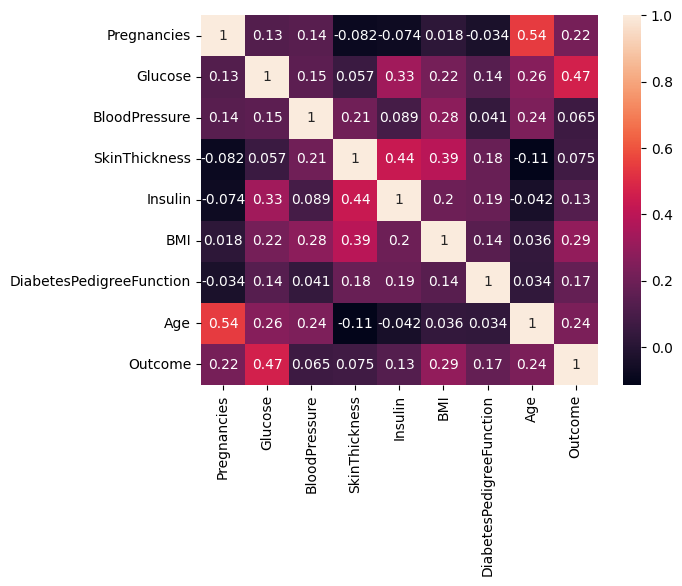

In [9]:
# Looking at correlation between different features
sns.heatmap(dataset.corr(),annot=True)
plt.show()

Observation 4: The outcome feature is positively correlated with glucose(0.47), BMI (0.29), age (0.24) and pregnancies(0.22). The blood pressure, skin thickness, insulin and DPF have almost no effect.  

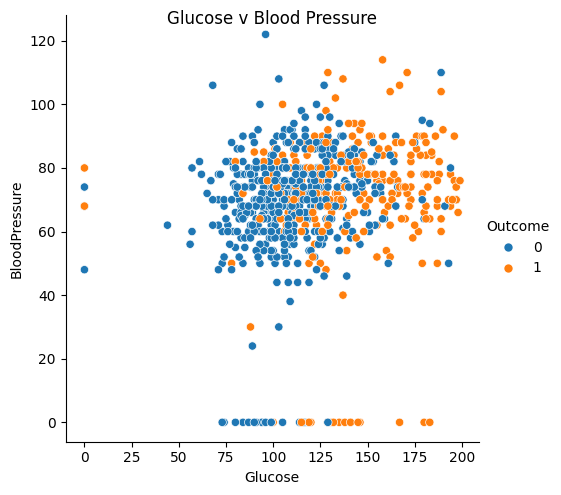

In [10]:
# Finding correlation between glucose levels and the features I think have no relevance
g=sns.relplot(x="Glucose",y="BloodPressure",hue="Outcome",data=dataset)
g.fig.suptitle("Glucose v Blood Pressure")
plt.show()

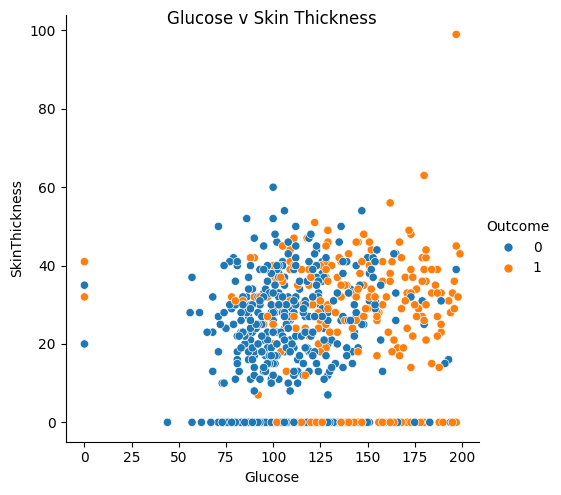

In [11]:
# Correlation between glucose and skin thickness
g=sns.relplot(x="Glucose",y="SkinThickness",hue="Outcome",data=dataset)
g.fig.suptitle("Glucose v Skin Thickness")
plt.show()

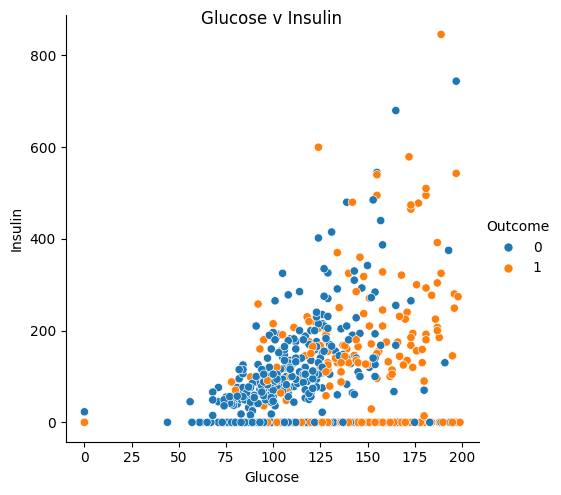

In [12]:
# Correlation between glucose and insulin
g=sns.relplot(x="Glucose",y="Insulin",hue="Outcome",data=dataset)
g.fig.suptitle("Glucose v Insulin")
plt.show()

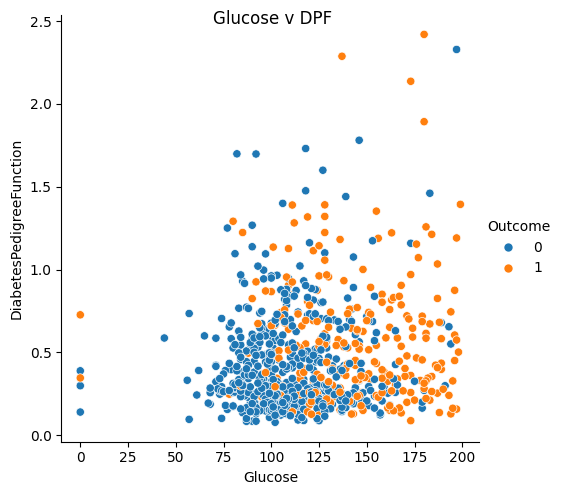

In [13]:
# Finding correlation between glucose and DiabetesPedigreeFunction
g=sns.relplot(x="Glucose",y="DiabetesPedigreeFunction",hue="Outcome",data=dataset)
g.fig.suptitle("Glucose v DPF")
plt.show()

In [14]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [18]:
# Dropping skin thickness and blood pressure because the correlation is almost equal to zero
#dataset.drop(columns=["BloodPressure","SkinThickness"],inplace=True)

In [15]:
dataset.shape

(768, 9)

In [16]:
# Removing outliers
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

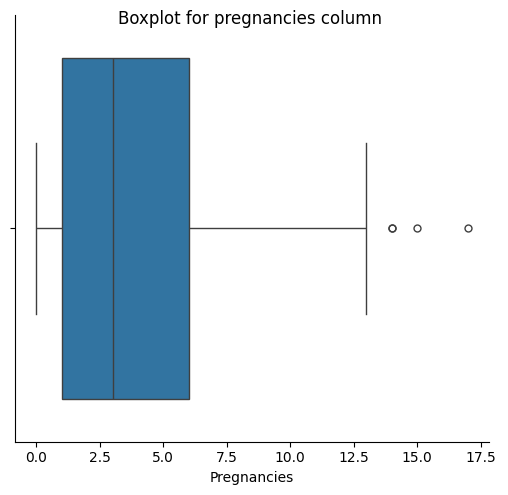

In [17]:
a = sns.catplot(x="Pregnancies",kind="box",data=dataset)
a.fig.suptitle("Boxplot for pregnancies column")
plt.show()

Observation 5: There are outliers in pregnancies but the values are fine. 15,16 or 17 pregnancies can exist in this world theoretically.

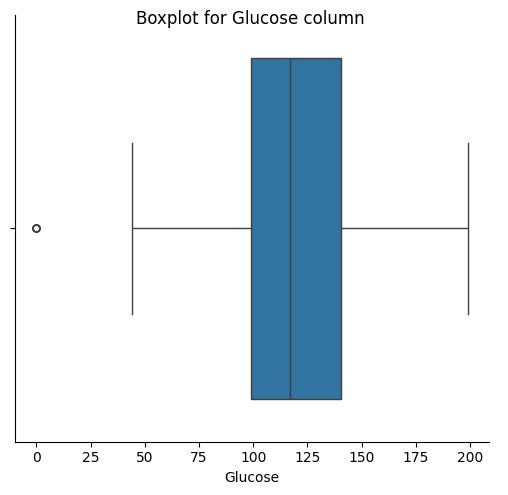

In [18]:
c = sns.catplot(x="Glucose",kind="box",data=dataset)
c.fig.suptitle("Boxplot for Glucose column")
plt.show()

In [19]:
q1 = dataset["Glucose"].quantile(0.25)
q3 = dataset["Glucose"].quantile(0.75)
IQR = q3-q1
min_value = q1 - (1.5 * IQR)
max_value = q3 + (1.5 * IQR)
data_1 = dataset[(dataset["Glucose"] >= min_value) & (dataset["Glucose"] <=max_value)]

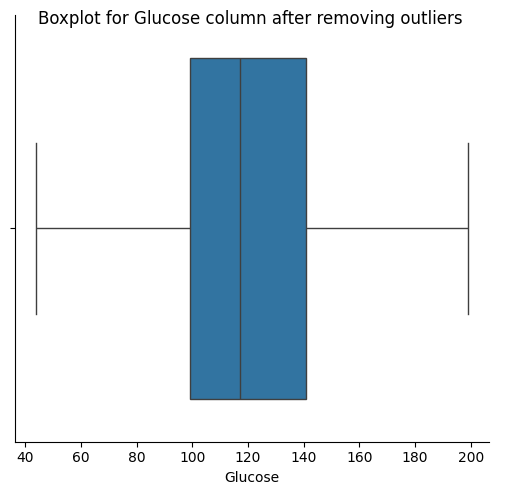

In [20]:
data_1.shape
d = sns.catplot(x="Glucose",kind="box",data=data_1)
d.fig.suptitle("Boxplot for Glucose column after removing outliers")
plt.show()

Observation 6: 5 rows were removed during glucose outlier removal

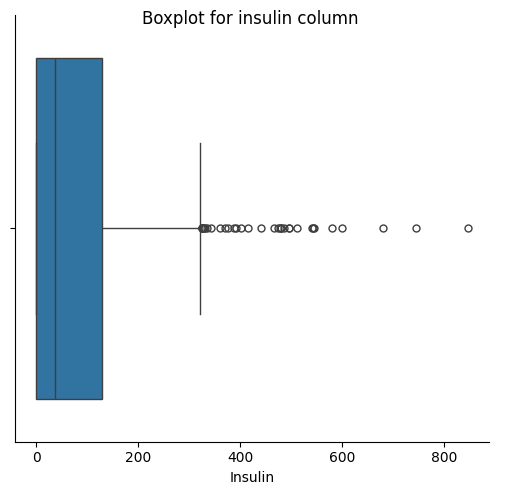

In [21]:
e = sns.catplot(x="Insulin",kind="box",data=data_1)
e.fig.suptitle("Boxplot for insulin column")
plt.show()

In [22]:
q1 = data_1["Insulin"].quantile(0.25)
q3 = data_1["Insulin"].quantile(0.75)
IQR = q3-q1
min_value = q1 - (1.5 * IQR)
max_value = q3 + (1.5 * IQR)
data_2 = data_1[(data_1["Insulin"] >= min_value) & (data_1["Insulin"] <=max_value)]

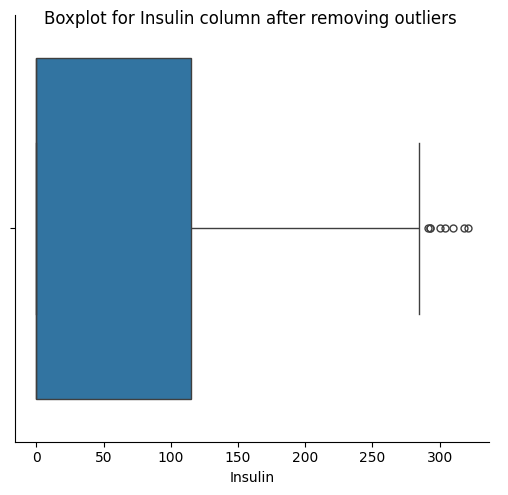

In [23]:
f = sns.catplot(x="Insulin",kind="box",data=data_2)
f.fig.suptitle("Boxplot for Insulin column after removing outliers")
plt.show()

Obervation 7: 33 rows were lost during insulin outlier removal

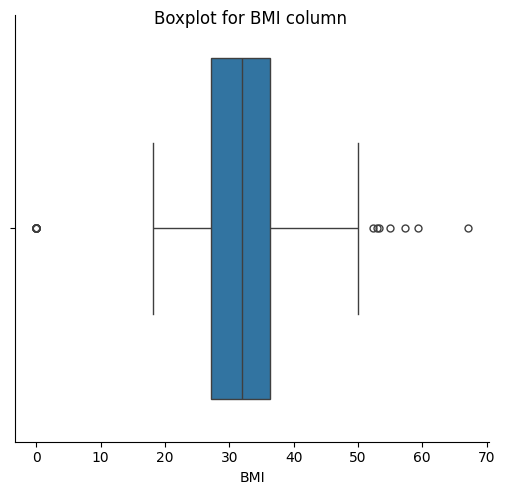

In [24]:
g = sns.catplot(x="BMI",kind="box",data=data_2)
g.fig.suptitle("Boxplot for BMI column")
plt.show()

In [25]:
q1 = data_2["BMI"].quantile(0.25)
q3 = data_2["BMI"].quantile(0.75)
IQR = q3-q1
min_value = q1 - (1.5 * IQR)
max_value = q3 + (1.5 * IQR)
data_3 = data_2[(data_2["BMI"] >= min_value) & (data_2["BMI"] <=max_value)]

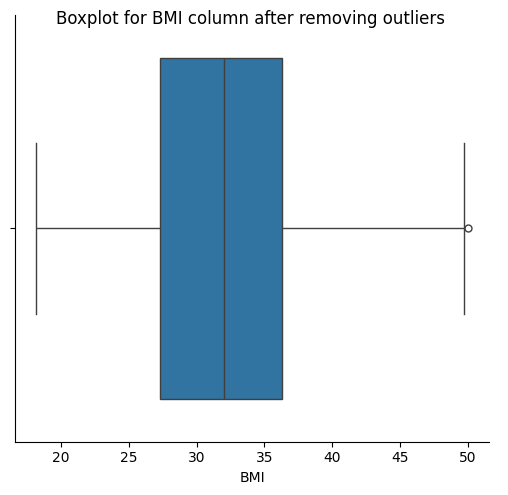

In [26]:
h = sns.catplot(x="BMI",kind="box",data=data_3)
h.fig.suptitle("Boxplot for BMI column after removing outliers")
plt.show()

Observation 8: 18 rows were removed while outlier removal of BMI

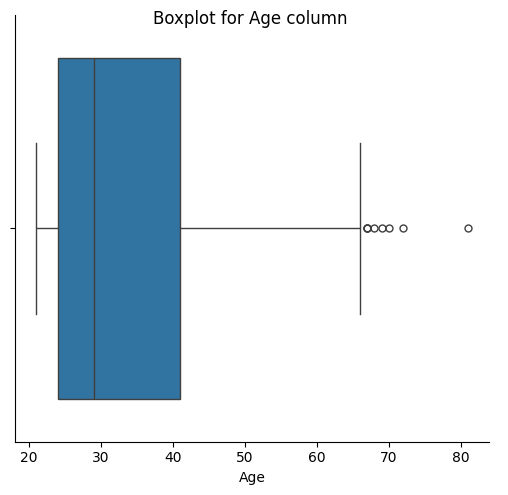

In [27]:
i = sns.catplot(x="Age",kind="box",data=data_3)
i.fig.suptitle("Boxplot for Age column")
plt.show()

In [28]:
q1 = data_3["Age"].quantile(0.25)
q3 = data_3["Age"].quantile(0.75)
IQR = q3-q1
min_value = q1 - (1.5 * IQR)
max_value = q3 + (1.5 * IQR)
data_4 = data_3[(data_3["Age"] >= min_value) & (data_3["Age"] <=max_value)]

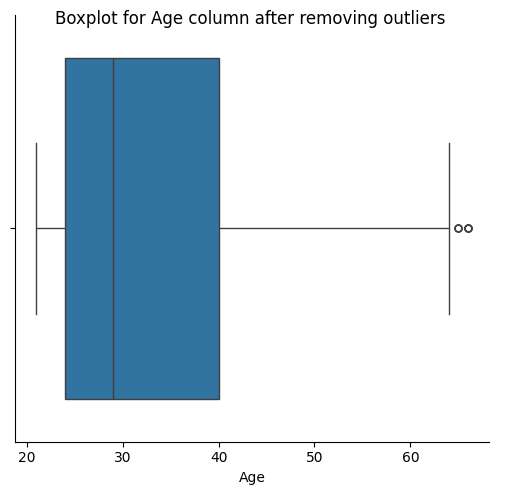

In [29]:
j = sns.catplot(x="Age",kind="box",data=data_4)
j.fig.suptitle("Boxplot for Age column after removing outliers")
plt.show()

Observation 9: 8 rows were removed while outlier removal of age column

Total of 64 rows were dropped during outlier removal process

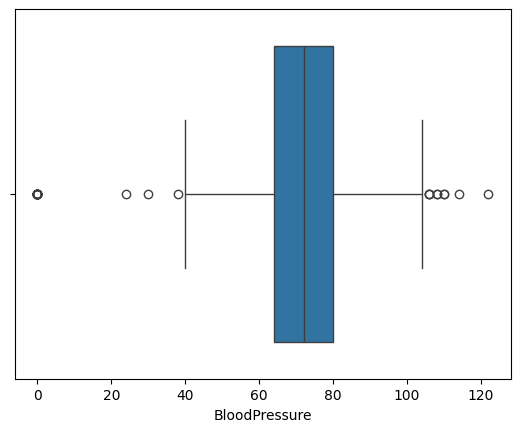

In [32]:
#
sns.boxplot(x="BloodPressure",data=data_4)
plt.show()

In [34]:
q1 = data_4["BloodPressure"].quantile(0.25)
q3 = data_4["BloodPressure"].quantile(0.75)
IQR = q3-q1
min_value = q1 - (1.5 * IQR)
max_value = q3 + (1.5 * IQR)
data_5 = data_4[(data_4["BloodPressure"] >= min_value) & (data_4["BloodPressure"] <=max_value)]

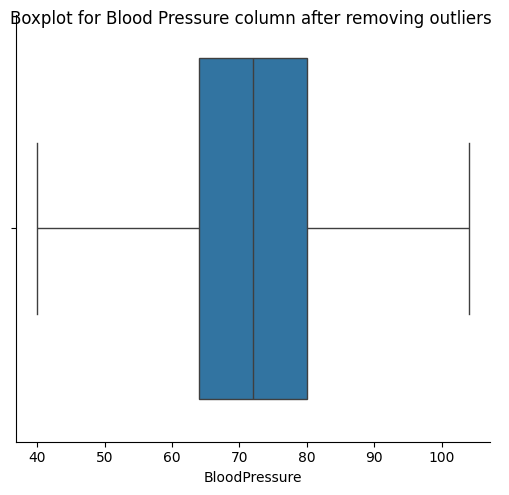

In [35]:
j = sns.catplot(x="BloodPressure",kind="box",data=data_5)
j.fig.suptitle("Boxplot for Blood Pressure column after removing outliers")
plt.show()

Observation: 38 rows are lost while removing BP outliers

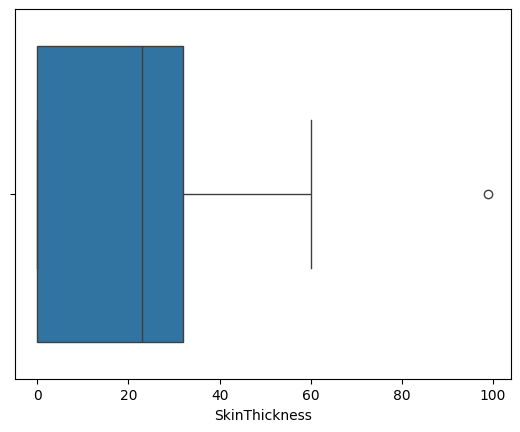

In [39]:
sns.boxplot(x="SkinThickness",data=data_5)
plt.show()

In [42]:
q1 = data_5["SkinThickness"].quantile(0.25)
q3 = data_5["SkinThickness"].quantile(0.75)
IQR = q3-q1
min_value = q1 - (1.5 * IQR)
max_value = q3 + (1.5 * IQR)
data_6 = data_5[(data_5["SkinThickness"] >= min_value) & (data_5["SkinThickness"] <=max_value)]

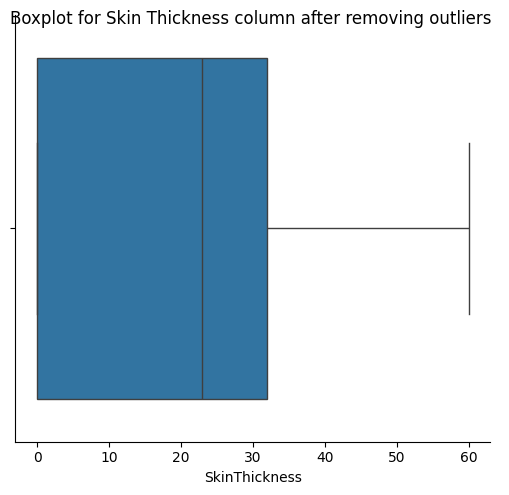

In [43]:
l = sns.catplot(x="SkinThickness",kind="box",data=data_6)
l.fig.suptitle("Boxplot for Skin Thickness column after removing outliers")
plt.show()

1 row was removed while handling skin thickness column outlier

<Axes: >

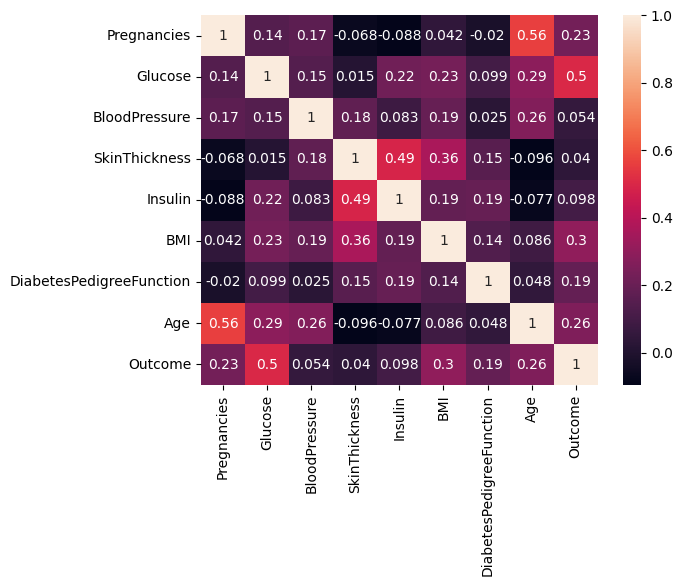

In [30]:
sns.heatmap(data_6.corr(),annot=True)

In [45]:
data_6.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [46]:
data_6["Outcome"]=data_6["Outcome"].astype("category")
data_6.dtypes

<ipython-input-46-98c2ffaeb07a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_6["Outcome"]=data_6["Outcome"].astype("category")


,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,category


In [47]:
x = data_6.iloc[:,:-1]
y = data_6["Outcome"]

In [48]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x)
x = pd.DataFrame(ss.transform(x),columns=x.columns)

In [50]:
y.value_counts(normalize=True) * 100

,proportion
Outcome,
0,67.067669
1,32.932331


In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [52]:
from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler(random_state=42)

x_resampled, y_resampled = rus.fit_resample(x_train, y_train)


In [53]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_resampled, y_resampled)
print(lr.score(x_test,y_test)*100)
print(lr.score(x_resampled, y_resampled)*100)

75.93984962406014
76.88022284122563


In [56]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_resampled, y_resampled)
print(gnb.score(x_test,y_test)*100)
print(gnb.score(x_resampled, y_resampled)*100)

71.42857142857143
76.46239554317549


In [63]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=6)
dtc.fit(x_resampled, y_resampled)
print(dtc.score(x_test,y_test)*100)
print(dtc.score(x_resampled, y_resampled)*100)

76.69172932330827
88.16155988857939


In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,p=2)
knn.fit(x_resampled, y_resampled)
print(knn.score(x_test,y_test)*100)
print(knn.score(x_resampled, y_resampled)*100)

75.93984962406014
86.0724233983287


In [81]:
from sklearn.svm import SVC
#svc = SVC(kernel="poly",degree=7)
svc = SVC(kernel="linear")
svc.fit(x_resampled, y_resampled)
print(svc.score(x_test,y_test)*100)
print(svc.score(x_resampled, y_resampled)*100)

72.93233082706767
75.34818941504177


In [82]:
y_resampled.value_counts()

,count
Outcome,
0,359
1,359
